In [2]:
import sublattice as sl
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload

In [40]:
reload(sl)
B2Binary = sl.B2Binary

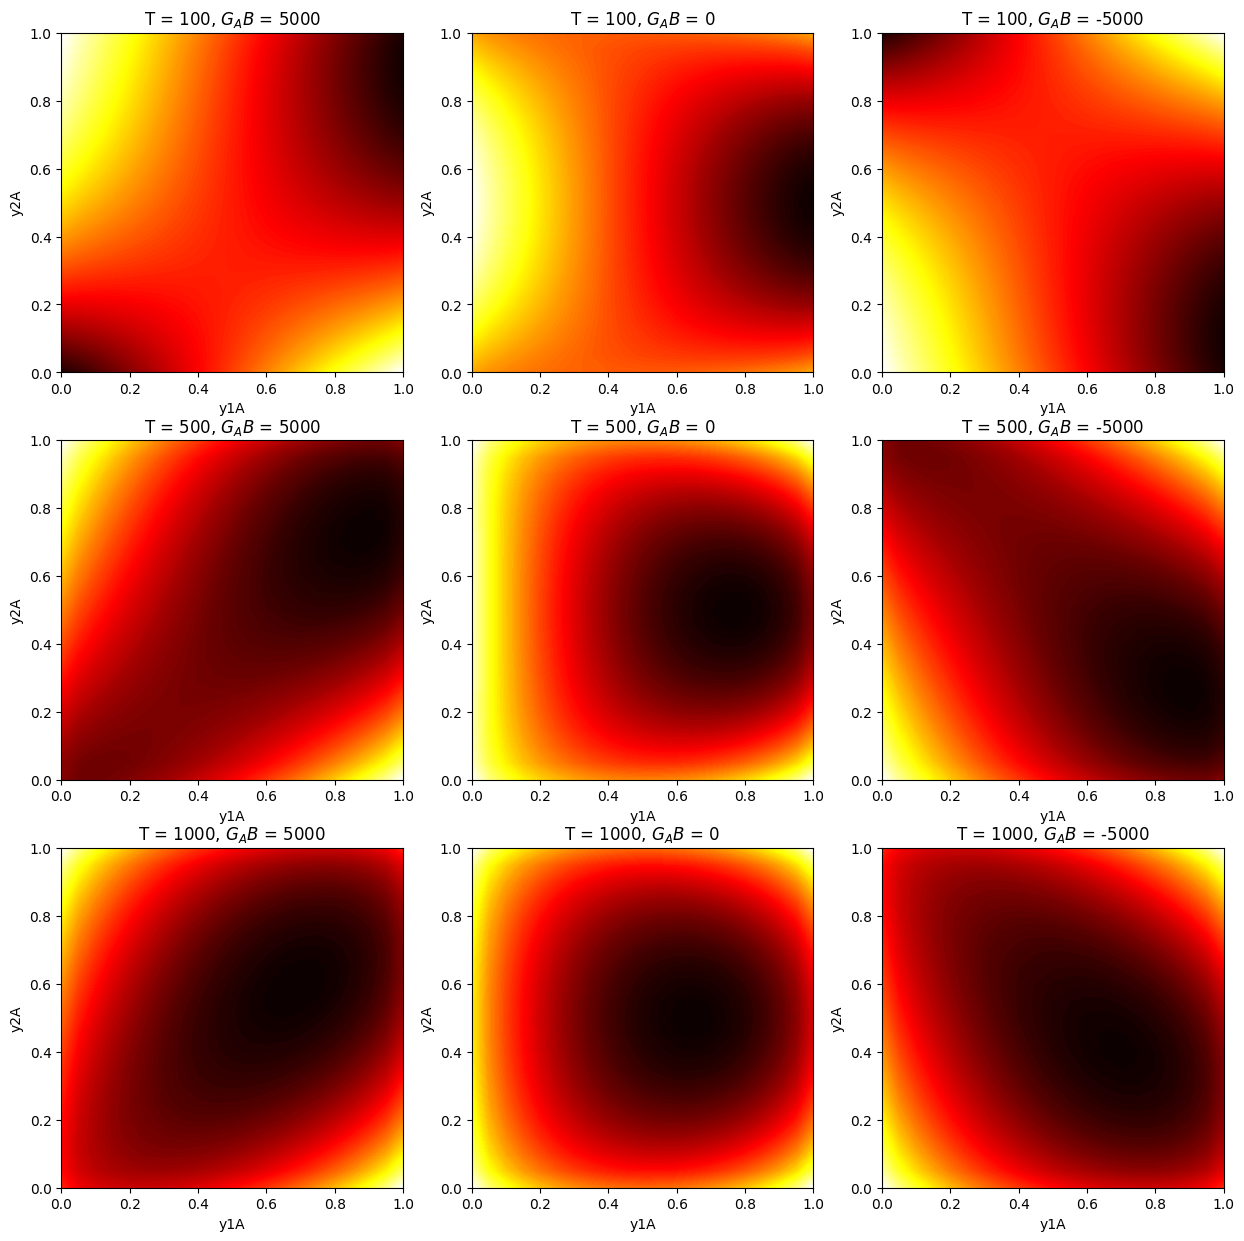

In [36]:
y1A = np.linspace(0, 1, 21)
y2A = np.linspace(0, 1, 21)

fig, axs = plt.subplots(3, 3, figsize=(15, 15))
for i, T in enumerate([100, 500, 1000]):
    for j, gab in enumerate([5000, 0, -5000]):
        system = B2Binary(0, gab, 0)
        # 副格子1はAが占めるほうが安定
        system.L1A = np.array([-5000])
        system.L1B = np.array([5000])
        g = system.Gibbs(y1A, y2A, T, mesh=True)

        ax = axs[i, j]
        ax.contourf(y1A, y2A, g, 128, cmap="hot")
        ax.set_title(f"T = {T}, $G_AB$ = {gab}")
        ax.set_xlabel("y1A")
        ax.set_ylabel("y2A")

        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)

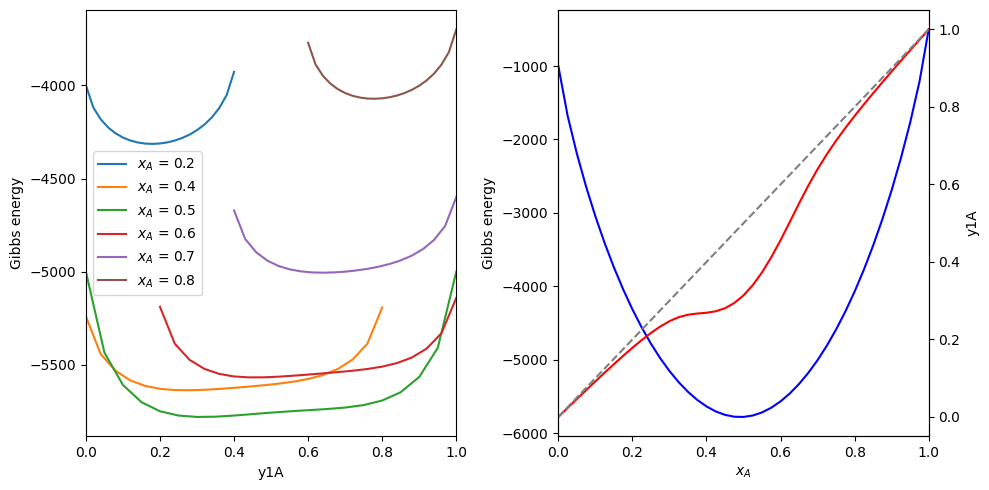

In [48]:
T = 500
gab = -5000
L1A = np.array([-300])
L1B = np.array([300])
system = B2Binary(-500, gab, -1000)
system.L1A, system.L1B = L1A, L1B

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

ax = axs[0]
for xA in (0.2, 0.4, 0.5, 0.6, 0.7, 0.8):
    y1A = np.linspace(max(0, 2*xA-1), min(1, 2*xA), 21)
    y2A = 2*xA - y1A
    g = system.Gibbs(y1A, y2A, T)
    ax.plot(y1A, g, label=f"$x_A$ = {xA:.1f}")

ax.set_ylabel("Gibbs energy")
ax.set_xlabel("y1A")
ax.legend()
ax.set_xlim(0, 1)

xA = np.linspace(0, 1, 41)
g = np.full_like(xA, np.nan)
y1A = np.full_like(xA, np.nan)

for i, x in enumerate(xA):
    res = system.opt_g(x, T)
    if res.success:
        g[i] = res.fun
        y1A[i] = res.x
    else:
        print(f"x={x} failed to optimize: {res.message}")

ax = axs[1]
ax.set_xlim(0, 1)
ax.plot(xA, g, label="Gibbs energy", color="blue")
ax.set_ylabel("Gibbs energy")
ax.set_xlabel("$x_A$")
ax = axs[1].twinx()
ax.plot(xA, y1A, label="y1A", color="red")
ax.plot([0, 1], [0, 1], color="gray", linestyle="--")
ax.set_ylabel("y1A")

fig.tight_layout()
